<a href="https://colab.research.google.com/github/isisCarolineLima/Redes_Convolucionais/blob/main/Trabalho_em_dupla_Grupo_47_Rede_Convoluicional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎲 Projeto: Implementação e Análise do Algoritmo de Redes Convolucionais

INTEGRANTES: Isis Caroline Lima Viana e Marco Antonio Oliveira Santos

#### 📂 Carregando o Dataset

In [50]:
#Ponto de partida
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 80% 91.0M/113M [00:00<00:00, 249MB/s]
100% 113M/113M [00:00<00:00, 205MB/s] 


In [51]:
print(files_in_photos)
print(len(files_in_photos))

['m1-011-01.jpg', 'm-039-01.jpg', 'm-065-01.jpg', 'm1-037-01.jpg', 'm-044-01.jpg', 'f1-004-01.jpg', 'm1-039-01.jpg', 'm-038-01.jpg', 'm-099-01.jpg', 'm1-005-01.jpg', 'm-016-01.jpg', 'm1-007-01.jpg', 'm-073-01.jpg', 'f-043-01.jpg', 'f-010-01.jpg', 'm-015-01.jpg', 'm-085-01.jpg', 'm-034-01.jpg', 'm1-028-01.jpg', 'm-049-01.jpg', 'm-091-01.jpg', 'm1-036-01.jpg', 'm-018-01.jpg', 'm-077-01.jpg', 'f-033-01.jpg', 'm-097-01.jpg', 'm-095-01.jpg', 'm-031-01.jpg', 'f-027-01.jpg', 'm-027-01.jpg', 'm-025-01.jpg', 'f-018-01.jpg', 'f1-011-01.jpg', 'f-024-01.jpg', 'm-089-01.jpg', 'f1-012-01.jpg', 'm-096-01.jpg', 'f-026-01.jpg', 'm1-023-01.jpg', 'm-041-01.jpg', 'f-039-01.jpg', 'm-010-01.jpg', 'f1-007-01.jpg', 'm-071-01.jpg', 'f1-001-01.jpg', 'm1-017-01.jpg', 'm-069-01.jpg', 'f-008-01.jpg', 'm-014-01.jpg', 'm-075-01.jpg', 'f1-010-01.jpg', 'm-052-01.jpg', 'm-061-01.jpg', 'm-019-01.jpg', 'f-022-01.jpg', 'm1-024-01.jpg', 'm-050-01.jpg', 'm-029-01.jpg', 'm1-038-01.jpg', 'f-005-01.jpg', 'm-037-01.jpg', 'm1-01

#### 🏷️ Rotulando os Dados

In [52]:
# Criando a lista de rótulos
def create_labels(file_list):
    """
    Cria uma lista de rótulos para os arquivos.
    0 - Masculino (arquivos começando com 'm')
    1 - Feminino (arquivos começando com 'f')
    """
    labels = []
    for file in file_list:
        if file.lower().startswith('m'):
            labels.append(0)  # Masculino
        elif file.lower().startswith('f'):
            labels.append(1)  # Feminino
        else:
            print(f"Aviso: Arquivo '{file}' não categorizado")
    return labels

# Chamando a função para os arquivos na pasta
labels = create_labels(files_in_photos)

# Exibindo os rótulos
print("Rótulos gerados:")
for file, label in zip(files_in_photos, labels):
    print(f"{file}: {label}")

Rótulos gerados:
m1-011-01.jpg: 0
m-039-01.jpg: 0
m-065-01.jpg: 0
m1-037-01.jpg: 0
m-044-01.jpg: 0
f1-004-01.jpg: 1
m1-039-01.jpg: 0
m-038-01.jpg: 0
m-099-01.jpg: 0
m1-005-01.jpg: 0
m-016-01.jpg: 0
m1-007-01.jpg: 0
m-073-01.jpg: 0
f-043-01.jpg: 1
f-010-01.jpg: 1
m-015-01.jpg: 0
m-085-01.jpg: 0
m-034-01.jpg: 0
m1-028-01.jpg: 0
m-049-01.jpg: 0
m-091-01.jpg: 0
m1-036-01.jpg: 0
m-018-01.jpg: 0
m-077-01.jpg: 0
f-033-01.jpg: 1
m-097-01.jpg: 0
m-095-01.jpg: 0
m-031-01.jpg: 0
f-027-01.jpg: 1
m-027-01.jpg: 0
m-025-01.jpg: 0
f-018-01.jpg: 1
f1-011-01.jpg: 1
f-024-01.jpg: 1
m-089-01.jpg: 0
f1-012-01.jpg: 1
m-096-01.jpg: 0
f-026-01.jpg: 1
m1-023-01.jpg: 0
m-041-01.jpg: 0
f-039-01.jpg: 1
m-010-01.jpg: 0
f1-007-01.jpg: 1
m-071-01.jpg: 0
f1-001-01.jpg: 1
m1-017-01.jpg: 0
m-069-01.jpg: 0
f-008-01.jpg: 1
m-014-01.jpg: 0
m-075-01.jpg: 0
f1-010-01.jpg: 1
m-052-01.jpg: 0
m-061-01.jpg: 0
m-019-01.jpg: 0
f-022-01.jpg: 1
m1-024-01.jpg: 0
m-050-01.jpg: 0
m-029-01.jpg: 0
m1-038-01.jpg: 0
f-005-01.jpg: 1
m-037-

#### 📐 Redimensionando as imagens

In [53]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Função para carregar e preprocessar as imagens
def load_and_preprocess_images(folder_path, labels, target_size=(250, 200)):
    """
    Carrega as imagens, redimensiona e normaliza os valores RGB.
    """
    images = []
    processed_labels = []
    for file, label in zip(os.listdir(folder_path), labels):
        file_path = os.path.join(folder_path, file)
        # Lê a imagem usando OpenCV
        image = cv2.imread(file_path)
        if image is not None:
            # Redimensiona a imagem
            resized_image = cv2.resize(image, (target_size[1], target_size[0]))
            # Normaliza os valores RGB para [0, 1]
            normalized_image = resized_image / 255.0
            images.append(normalized_image)
            processed_labels.append(label)
    return np.array(images), np.array(processed_labels)

# Carregando e preprocessando as imagens
photos_folder = "photos"
images, labels = load_and_preprocess_images(photos_folder, create_labels(files_in_photos))


#### 🔄 Divisão dos Dados

In [54]:
# Divisão do dataset
SEED = 23

# Divisão em treino (50%) e conjunto de validação+teste (50%)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.5, random_state=SEED)

# Divisão do conjunto de validação+teste em validação (30%) e teste (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=SEED)

# Exibindo as dimensões de cada conjunto
print(f"Treinamento: {X_train.shape}, {y_train.shape}")
print(f"Validação: {X_val.shape}, {y_val.shape}")
print(f"Teste: {X_test.shape}, {y_test.shape}")

Treinamento: (94, 250, 200, 3), (94,)
Validação: (56, 250, 200, 3), (56,)
Teste: (38, 250, 200, 3), (38,)


#### 🏋️‍♂️ Treinamento do Modelo



In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definindo o modelo CNN
def create_cnn(input_shape):
    model = models.Sequential()

    # Primeira camada convolucional
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Segunda camada convolucional
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Terceira camada convolucional
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Camada Flatten para achatar os dados
    model.add(layers.Flatten())

    # Camada densa totalmente conectada
    model.add(layers.Dense(128, activation='relu'))

    # Camada de saída com duas classes (0 e 1)
    model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid para saída binária (Masculino/Feminino)

    return model

In [56]:
# Criando e compilando o modelo
input_shape = (250, 200, 3)  # Altura, largura, canais de cor (RGB)
cnn_model = create_cnn(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 248, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 124, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 122, 97, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 61, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 59, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 29, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 85376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │      10,928,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,021,633 (42.04 MB)

 Trainable params: 11,021,633 (42.04 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Configuração do treinamento
EPOCHS = 20
BATCH_SIZE = 32

# Treinando o modelo
history = cnn_model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val)
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.7566 - loss: 1.4616 - val_accuracy: 0.2857 - val_loss: 0.7944
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.4669 - loss: 0.7221 - val_accuracy: 0.7143 - val_loss: 0.5212
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7186 - loss: 0.4865 - val_accuracy: 0.7500 - val_loss: 0.4483
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.8229 - loss: 0.4296 - val_accuracy: 0.8750 - val_loss: 0.3844
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.8882 - loss: 0.3264 - val_accuracy: 0.8929 - val_loss: 0.3414
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9223 - loss: 0.2283 - val_accuracy: 0.8750 - val_loss: 0.3302
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.9223 - loss: 0.1941 - val_accuracy: 0.8393 - val_loss: 0.3689
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9198 - loss: 0.1805 - val_accuracy: 0.8571 - val_loss: 0.3594
Epoch 9/

#### 📈 Avaliação do Modelo


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.8427 - loss: 0.9258
Perda no teste: 0.8895
Acurácia no teste: 0.8421


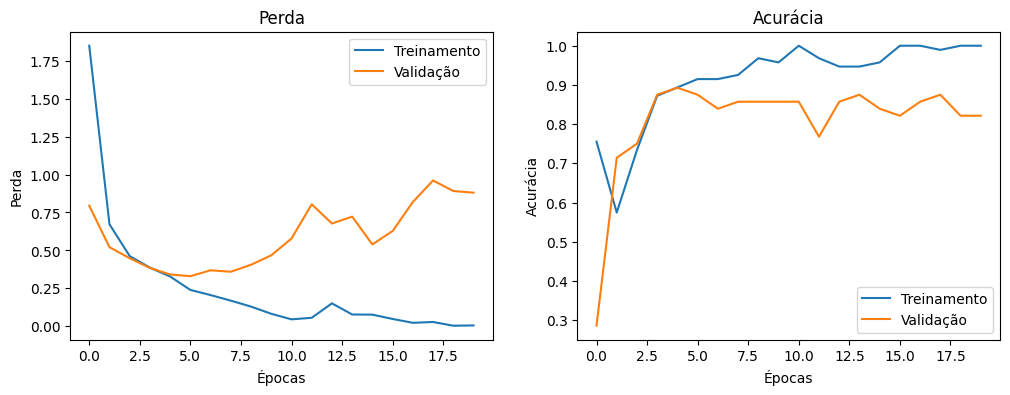

In [58]:
# Avaliação do desempenho no conjunto de teste
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Perda no teste: {test_loss:.4f}")
print(f"Acurácia no teste: {test_accuracy:.4f}")
import matplotlib.pyplot as plt

# Plotando perda e acurácia
plt.figure(figsize=(12, 4))

# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()